# Comparing the power-law collision kernels with jump kernels of subordinate processes. 

In [1]:
include("collisionkernels.jl")
using .CollisionKernels

include("subordinate.jl")
using .Subordinate

using Printf
using Plots
Threads.nthreads()

10

In [2]:
function draw_nice_pic(s::Array, focus::Integer)
    @assert 1 <= focus <= size(s)[1]
    P = size(s)[2]
    println("ν = ",νs[focus])
    q = qofν(νs[focus])
    cq = Cq(q)
    cν = Cnu(νs[focus])
    θr = range(π/(P+1),π/2,length=P)
    θrange = range(π/(P+1),π/2,length=100)
    brange = map(θ->symb(θ,q),θrange)
    srange = cq/cν * s[focus,:]
    plot(θr,(srange),label="b_{sub}", yaxis=:log)
    p2 = plot!(θrange,(brange),label="b_{col}", yaxis=:log)
    display(p2)
    println("Graph for ν=", νs[focus]," in logarithmic scale")
end

draw_nice_pic (generic function with 1 method)

The purpose of this file is to compare the Boltzmann collision kernel corresponding to inverse power-law potentials, with the jump kernel corresponding to subordinate processes.

The formula for the Boltzmann collision kernel is explained in Cedric's lecture notes from Festum Pi, Crete 2024. 

Any Boltzmann kernel with angular part $b(\cos \theta)$ is equivalent to another one $b_1(\cos \theta)$ provided that $b(\cos \theta) + b(\cos (\pi - \theta)) = b_1(\cos \theta) + b_1(\cos (\pi - \theta))$. Because of this, we symmetrize all kernels so that $b(\cos \theta) = b(\cos (\pi - \theta))$.

For inverse power laws with exponent $q$, we compute the symmetrized Boltzmann kernel $b_{col}(\cos \theta)$ using the function
`symb(\theta,q)`.
By default it computes it for dimension $d=3$, but it can be changed with some optional parameters.

This kernel will be symmetric $b_{col}(\cos \theta) = b_{col}(\cos (\pi - \theta))$ and it has the asymptotic behavior
$$ b_{col}(\cos \theta) \approx C_q \theta^{-d+1-\nu} $$
as $\theta \to 0$. The parameters $\nu$ and $C_q$ are computed with the function `νofq(q)` and `Cq(q)`.

We want to compare the kernel $b_{col}$ with kernels of the form
$$ b_\omega(\theta) = \int_0^\infty \omega(t) h_t(\theta) \, dt$$
Here, $\omega$ is an arbitrary nonnegative function and $h_t$ is the symmetrized heat kernel on the sphere $S^{d-1}$ (or equivalently, the heat kernel on $\mathbb{R}P^{d-1}$). One basic example of a kernel of this form is the one of the fractional Laplacian $(-\Delta)^{\nu/2}$, which corresponds to the weight $\omega(t) = c_\nu t^{-1-\nu/2}$.

We want to compare the kernel $b_{col}$ with some kernel $b_\omega$. Since we want to match the asymptotic behavior at $\theta \approx 0$, it is a reasonable idea to start comparing $b_{col}$ with the kernel of the fractional Laplacian $(-\Delta)^{\nu/2}$ that has the same asymptotic behavior as $\theta \to 0$.

In the next cell, we compute and plot both kernels. They are normalized so that their asymptotic behavior near $\theta = 0$ matches with the same multiplicative constant. The vertical axis of the plots is in logarithmic scale so that we see it more clearly.

 32.054391 seconds (765.20 M allocations: 14.870 GiB, 5.59% gc time, 8.08% compilation time)
  0.417800 seconds (1.28 M allocations: 37.598 MiB, 308.90% compilation time)
ν = 0.5


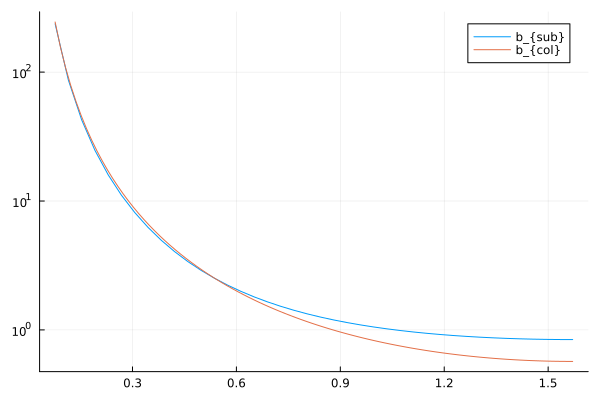

Graph for ν=0.5 in logarithmic scale
ν = 1.0


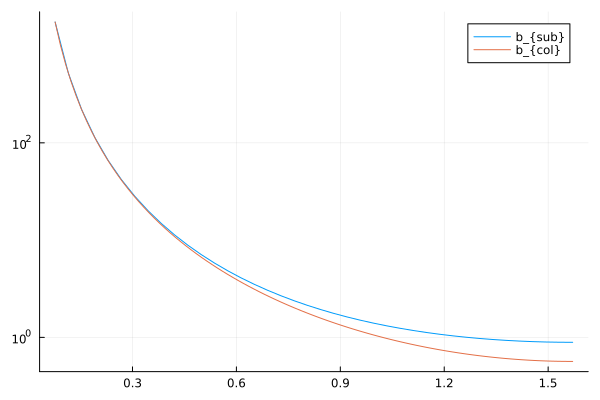

Graph for ν=1.0 in logarithmic scale
ν = 1.9


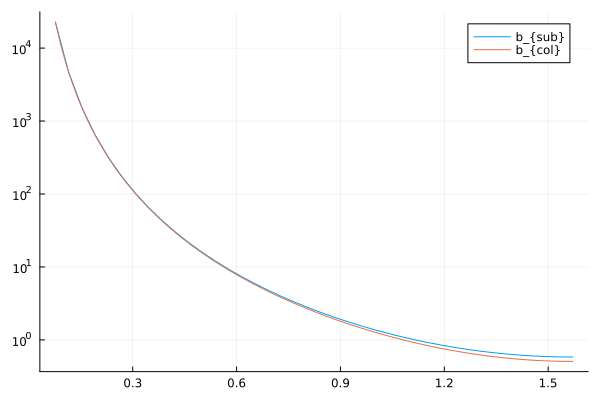

Graph for ν=1.9 in logarithmic scale


In [3]:
# P is the number of points used in the sample of the subordinate kernel
# The subordinate kernel will be compared with the collision kernel at P equidistant points between 0 and π/2
P = 40
@time a,m = pre_sample(P);

νs = [0.5, 1., 1.9]
@time sfl = sample_fractional_laplacian(νs,a,m)

draw_nice_pic(sfl,1)
draw_nice_pic(sfl,2)
draw_nice_pic(sfl,3)

We observe in the plots that the collision kernel of inverse power-laws does not coincide with the fractional Laplacian.

We then compare $b_{col}$ with $b_\omega$. We tested several nonnegative functions $\omega$ of the form $\omega(t) = c_\nu t^{-1-\nu/2} \omega_1(t)$. For $\nu \in [1.5,2)$, we obtained a relatively close match with the following choice of $\omega_1$.
$$ \omega(t) := 1 - \min\left( \frac{13}8 - \frac 34  ν, 0.4 \right)(1-\exp(-2t)).$$

With this choice of $\omega$, we compute the ratio between the minimum and maximum value of $b_{col}(\theta) / b_\omega(\theta)$ for various values of $\nu$. Then we make a few plots.

In [4]:
νs = [1.5,1.6,1.7,1.8,1.9,1.925,1.95,1.975,1.99,1.999]

ω(t,ν) = 1 - min(13/8 - 3/4 * ν, 0.4)*(1-exp(-2t))
@time s1 = sample_subordinate(νs,ω,a,m);
#@time s1 = sample_fractional_laplacian(νs,a,m);

  1.962804 seconds (4.84 M allocations: 166.220 MiB, 628.93% compilation time)


We get the following results.

In [5]:
for m in 1:length(νs)
    ν = νs[m]
    cν = Cnu(ν)
    qf = qofν(ν)
    cfq = Cq(qf)

    min = 1.
    max = 1.
    for i in 2:P
        θ = (1+i)/(P+1) * π/2
        ratio = s1[m,i] / cν / symb(θ,qf) * cfq
        if ratio<min
            min = ratio
        end
        if ratio>max
            max = ratio
        end
    end
    println("ν= ",ν,"   min ratio:",min/max)
end

ν= 1.5   min ratio:0.9814637894179115
ν= 1.6   min ratio:0.9675997085183903
ν= 1.7   min ratio:0.9733514831301147
ν= 1.8   min ratio:0.9843655379172919
ν= 1.9   min ratio:0.9852531955904288
ν= 1.925   min ratio:0.984851885904584
ν= 1.95   min ratio:0.984659891789157
ν= 1.975   min ratio:0.9836161181895469
ν= 1.99   min ratio:0.9819187112408394
ν= 1.999   min ratio:0.9800389894273984


We will now draw some graphs to show how $b_{col}$ and $b_{sub}$ resemble each other. 

The blue line corresponds to the kernel $b_{sub}$ renormalized. The red line is the kernel $b_{col}$. In most of the graphs the lines are one of top of the other. We can barely recognize there are two distinct curves.

Recall that the graphs are in logarithmic scale and the kernels are normalized to match their asymptotics as $\theta \to 0$.

ν = 1.5


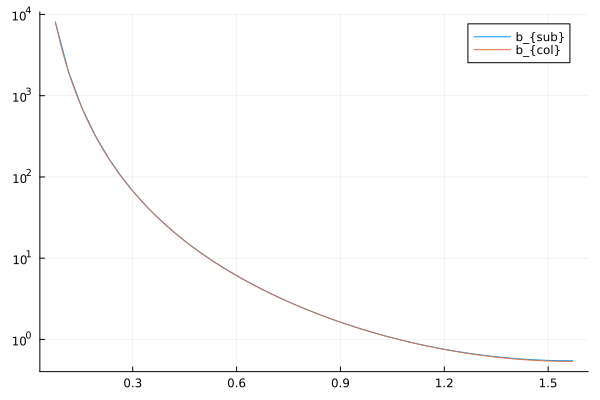

Graph for ν=1.5 in logarithmic scale


In [6]:
draw_nice_pic(s1,1)

ν = 1.8


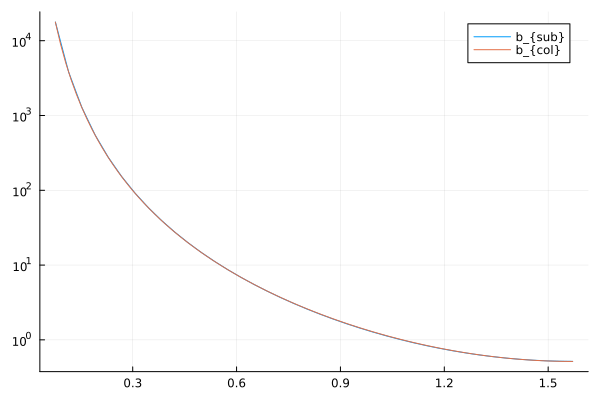

Graph for ν=1.8 in logarithmic scale


In [7]:
draw_nice_pic(s1,4)

ν = 1.95


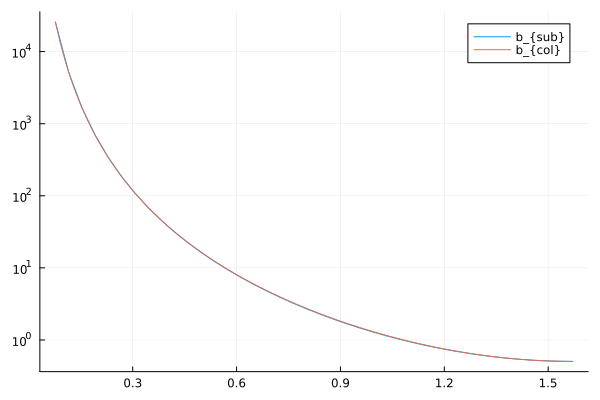

Graph for ν=1.95 in logarithmic scale


In [8]:
draw_nice_pic(s1,7)

ν = 1.999


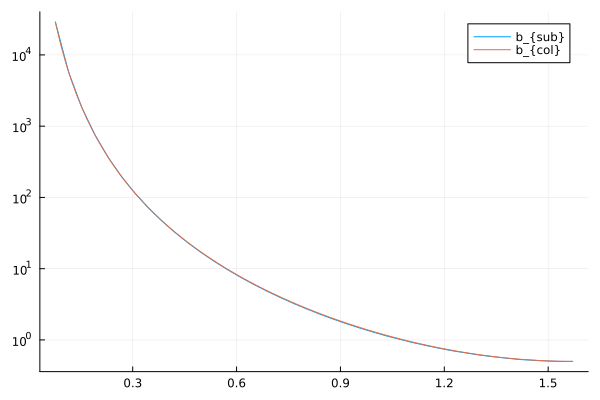

Graph for ν=1.999 in logarithmic scale


In [9]:
draw_nice_pic(s1,10)

Finally, for each kernel $b_\omega$, we compute a lower bound for $\Lambda_{b_\omega}$ using the formulas in our paper. Then, we compute the implied lower bound for $\Lambda_{b_{col}}$ in terms of the ration $c_2/C_1$.

In [10]:
function make_table(νs::Vector, s1::Array)
    P = size(s1)[2]

    output = "| ν | γ | ratio = c_2/C_1 | lower bound for \$2\\sqrt{\\Lambda_b}\$ | \n"
    output *="|---|---|---|---| \n"
    
    for m in 1:length(νs)
        ν = νs[m]
        qf = qofν(ν)
        cν = Cnu(ν)
        cfq = Cq(qf)

        Λb = compute_Λb(ν,t->ω(t,ν))
        
        min = 1.
        max = 1.
        for i in 2:P
            θ = (1+i)/(P+1) * π/2
            ratio = s1[m,i] / cν / symb(θ,qf) * cfq
            if ratio<min
                min = ratio
            end
            if ratio>max
                max = ratio
            end
        end
        output *= @sprintf "| %.3f | %.2f | %.2f | %.2f | \n" ν (qf-5)/(qf-1) min/max 2*sqrt(Λb*min/max)
        # println(qf," & ", ν," & ", (qf-5)/(qf-1)," & ", min/max," & ", 2*sqrt(Λb*min/max)," \\\\ ")
    end
    display("text/markdown",output)
end;

In [11]:
make_table(νs,s1)

| ν | γ | ratio = c_2/C_1 | lower bound for $2\sqrt{\Lambda_b}$ | 
|---|---|---|---| 
| 1.500 | -2.00 | 0.98 | 4.36 | 
| 1.600 | -2.20 | 0.97 | 4.38 | 
| 1.700 | -2.40 | 0.97 | 4.45 | 
| 1.800 | -2.60 | 0.98 | 4.53 | 
| 1.900 | -2.80 | 0.99 | 4.59 | 
| 1.925 | -2.85 | 0.98 | 4.61 | 
| 1.950 | -2.90 | 0.98 | 4.62 | 
| 1.975 | -2.95 | 0.98 | 4.64 | 
| 1.990 | -2.98 | 0.98 | 4.64 | 
| 1.999 | -3.00 | 0.98 | 4.64 | 
